<a href="https://colab.research.google.com/github/VISHNUCHARAN27/DEEP-LEARNING/blob/master/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnu2799","key":"a3470c3a592aa9d771d440897bc95080"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 66 Feb 19 12:23 kaggle.json
{"username":"vishnu2799","key":"a3470c3a592aa9d771d440897bc95080"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 3.2MB/s 
    100% |████████████████████████████████| 5.3MB 4.9MB/s 
    100% |████████████████████████████████| 92kB 24.8MB/s 
    100% |████████████████████████████████| 51kB 16.7MB/s 


# **DOWNLOAD DATASETS**

In [0]:
!kaggle datasets download -d zalando-research/fashionmnist

 95% 65.0M/68.8M [00:00<00:00, 102MB/s]
100% 68.8M/68.8M [00:00<00:00, 93.3MB/s]


In [0]:
%ls

fashionmnist.zip  kaggle.json  sample_data/


In [0]:
!unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


# PREPARING THE DATASETS 

In [0]:
import pandas as pd

train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

y_train=train["label"]

X_train=train.drop(labels=['label'],axis=1)

y_train.value_counts(ascending=True)  #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html



0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [0]:
X_train.isnull().any().describe() #https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [0]:
print(X_train.shape)

(60000, 784)


For Pandas dataframe refer 

https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/

Reshaping the X_train csv file

In [0]:
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_train=X_train/255.0



TO PLOT AN IMAGE OF X_TRAIN

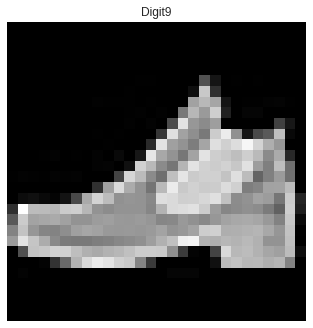

In [0]:
import matplotlib.pyplot as plt


plt.imshow(X_train[1][:,:,0], cmap='gray', interpolation='none')
plt.title('Digit{}'.format(y_train[1].argmax() ))  #Use ardmax for after using to_categorical
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense,MaxPooling2D,Conv2D,Flatten


model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))



model.add(Flatten())

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxP

This is an error note it. To know the error run the program

In [0]:
model.fit(X_train,y_train,epochs=20,batch_size=128)
score = model.evaluate(X_test, y_test, batch_size=128)


Corrected code

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [0]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
model.fit(X_train,y_train,epochs=20,batch_size=128)


Epoch 1/20
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.4447 - acc: 0.8404
Epoch 2/20
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.4042 - acc: 0.8536
Epoch 3/20
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.3844 - acc: 0.8603
Epoch 4/20
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.3587 - acc: 0.8700
Epoch 5/20
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.3405 - acc: 0.8762
Epoch 6/20
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.3276 - acc: 0.8806
Epoch 7/20
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.3137 - acc: 0.8871
Epoch 8/20
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.2985 - acc: 0.8905
Epoch 9/20
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.2885 - acc: 0.8945
Epoch 10/20
60000/60000 [==============================] - 129s 2ms/sampl

In [0]:
y_test=test["label"]
X_test=test.drop(labels=["label"],axis=1)



In [0]:
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

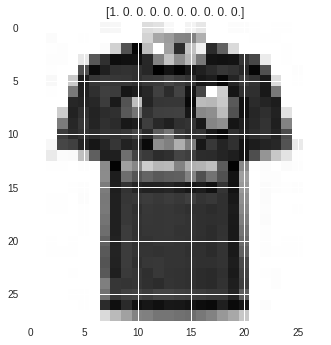

In [0]:
plt.imshow(1-X_test[0][:,:,0],cmap='gray')
plt.title(y_test[0])

In [0]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)

In [0]:
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
print(X_test[0])


In [0]:
model.save('FASHION-MNIST')

In [0]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model("FASHION-MNIST")

In [0]:
from google.colab import files
files.download('FASHION-MNIST')

# **TEST YOUR DATASETS**

                    6)shirt


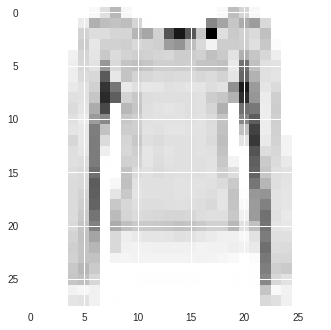

In [0]:
image_index = 2
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print('                    '+str(pred.argmax())+')'+ labelNames[pred.argmax()])

